In [53]:
# Use the Azure Machine Learning data preparation package
from azureml.dataprep import package

# Use the Azure Machine Learning data collector to log various metrics
from azureml.logging import get_azureml_logger
logger = get_azureml_logger()


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
# Use Azure Machine Learning history magic to control history collection
# History is off by default, options are "on", "off", or "show"
# %azureml history on


In [55]:
# This call will load the referenced package and return a DataFrame.
# If run in a PySpark environment, this call returns a
# Spark DataFrame. If not, it returns a Pandas DataFrame.
features = package.run('dprep1.dprep', dataflow_idx=2)

# Remove this line and add code that uses the DataFrame
features.head(3)


,area_is_metro,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,is_yr_a,heart_disease_mortality_per_100k
0,True,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,...,0.089,NaN,0.332,13.0,2.8,15.09,1650.0,1489.0,True,312.0
1,True,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,...,0.082,0.181,0.265,10.0,2.3,19.79,2010.0,2480.0,True,257.0
2,True,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,...,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,False,195.0


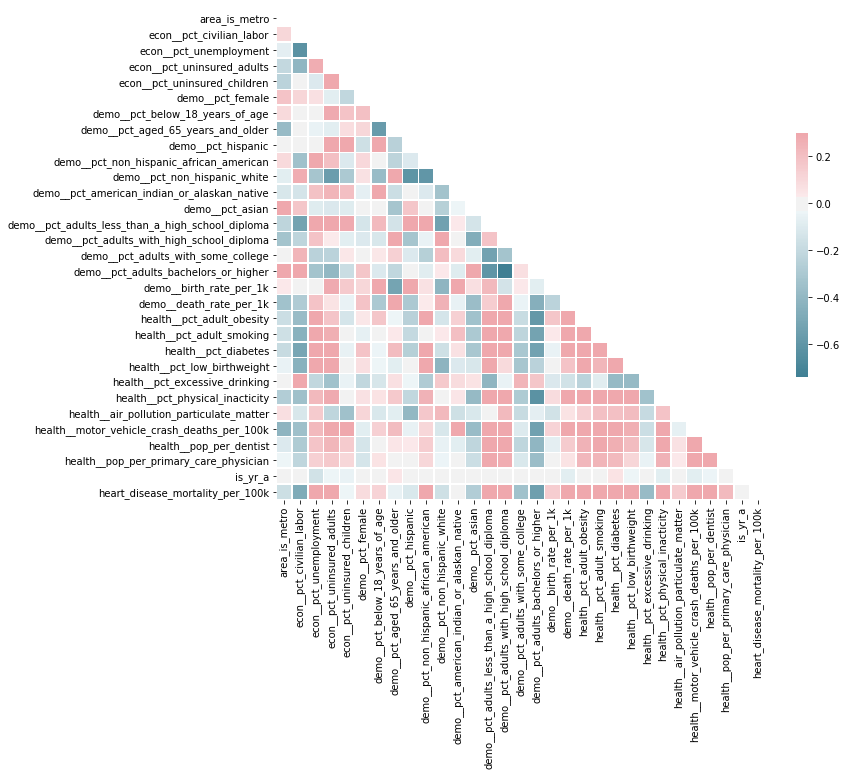

In [56]:
dff = features #[['health__pct_adult_smoking', 'health__pct_excessive_drinking', 'demo__death_rate_per_1k']]


# Compute the correlation matrix
corr = dff.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [57]:
corr

,area_is_metro,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,is_yr_a,heart_disease_mortality_per_100k
area_is_metro,1.000000e+00,0.108040,-0.072320,-0.204723,-0.235570,0.184396,0.095021,-0.375582,0.005792,0.096162,...,-0.184029,-0.050820,-0.020363,-0.272103,0.077118,-0.415698,-0.103737,-0.036917,-9.663226e-18,-0.165033
econ__pct_civilian_labor,1.080403e-01,1.000000,-0.619050,-0.409084,-0.027494,0.110016,-0.014214,0.005105,0.006413,-0.344771,...,-0.501138,-0.438661,0.387857,-0.346026,-0.117639,-0.346759,-0.285938,-0.218591,-1.532624e-02,-0.476644
econ__pct_unemployment,-7.232014e-02,-0.619050,1.000000,0.272174,-0.104250,0.071061,0.004807,-0.049590,-0.023614,0.382720,...,0.421372,0.378766,-0.214149,0.230216,0.150009,0.229797,0.178324,0.136225,-1.508019e-01,0.371620
econ__pct_uninsured_adults,-2.047227e-01,-0.409084,0.272174,1.000000,0.717686,-0.075923,0.280156,-0.075758,0.477905,0.206069,...,0.294417,0.327780,-0.340959,0.285383,-0.219350,0.455132,0.237915,0.165261,-3.074474e-02,0.334217
econ__pct_uninsured_children,-2.355696e-01,-0.027494,-0.104250,0.717686,1.000000,-0.210481,0.183530,0.083595,0.441586,-0.102605,...,-0.055636,0.023666,-0.045826,0.009911,-0.345746,0.406176,0.152708,0.103520,-5.066116e-02,-0.034482
demo__pct_female,1.843964e-01,0.110016,0.071061,-0.075923,-0.210481,1.000000,0.198426,0.106818,-0.161775,0.098055,...,0.189265,0.074387,-0.215347,0.068177,0.109214,-0.078898,-0.131156,-0.131682,-1.894375e-02,0.087040
demo__pct_below_18_years_of_age,9.502141e-02,-0.014214,0.004807,0.280156,0.183530,0.198426,1.000000,-0.566433,0.320619,0.021930,...,-0.039540,-0.034874,-0.125961,0.061171,-0.113426,0.136475,0.010419,0.063192,-2.166158e-02,0.121956
demo__pct_aged_65_years_and_older,-3.755825e-01,0.005105,-0.049590,-0.075758,0.083595,0.106818,-0.566433,1.000000,-0.245170,-0.225004,...,0.213014,-0.076327,0.069281,0.164289,-0.074186,0.214857,0.049268,-0.004279,4.476257e-02,-0.056203
demo__pct_hispanic,5.791943e-03,0.006413,-0.023614,0.477905,0.441586,-0.161775,0.320619,-0.245170,1.000000,-0.105977,...,-0.252581,-0.005086,-0.031318,-0.215272,-0.392282,-0.053457,0.033520,0.000065,1.315871e-02,-0.112437
demo__pct_non_hispanic_african_american,9.616177e-02,-0.344771,0.382720,0.206069,-0.102605,0.098055,0.021930,-0.225004,-0.105977,1.000000,...,0.486529,0.681410,-0.284243,0.257043,0.166423,0.106834,0.148207,0.108058,1.905300e-03,0.375385


In [59]:
# dealing with missing values

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

features = features.fillna(features.mean())

features

,area_is_metro,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,is_yr_a,heart_disease_mortality_per_100k
0,True,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,...,0.089000,0.164841,0.332,13.000000,2.800000,15.090000,1650.000000,1489.000000,True,312.0
1,True,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,...,0.082000,0.181000,0.265,10.000000,2.300000,19.790000,2010.000000,2480.000000,True,257.0
2,True,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,...,0.098000,0.195000,0.209,10.000000,9.310000,3.140000,629.000000,690.000000,False,195.0
3,False,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,...,0.058000,0.164841,0.238,13.000000,5.947498,21.132618,1810.000000,6630.000000,False,218.0
4,False,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,...,0.070000,0.194000,0.290,9.000000,5.947498,29.390000,3489.000000,2590.000000,True,355.0
5,False,0.501,0.048,0.212,0.055,0.516,0.207,0.121,0.022,0.046,...,0.089000,0.067000,0.272,13.000000,3.800000,13.740000,2439.000000,1540.000000,True,288.0
6,False,0.462,0.088,0.180,0.039,0.507,0.221,0.167,0.034,0.002,...,0.070000,0.193000,0.282,12.000000,5.947498,18.550000,3100.000000,3689.000000,False,283.0
7,True,0.425,0.077,0.252,0.079,0.499,0.247,0.134,0.053,0.224,...,0.092000,0.130000,0.277,13.000000,5.600000,22.270000,2800.000000,1790.000000,True,315.0
8,False,0.313,0.111,0.275,0.063,0.473,0.248,0.110,0.015,0.719,...,0.139000,0.106000,0.373,12.000000,13.600000,22.780000,3990.000000,3549.000000,True,426.0
9,False,0.371,0.044,0.241,0.110,0.489,0.347,0.121,0.014,0.000,...,0.073000,0.214000,0.333,9.000000,5.947498,63.150000,3431.433649,2551.339286,True,309.0


In [60]:
# Labels are the values we want to predict
labels = np.array(features['heart_disease_mortality_per_100k'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('heart_disease_mortality_per_100k', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [61]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [66]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

rmse = sqrt(mean_squared_error(test_labels, predictions))

# Print out the rmse
print('RMSE:', round(np.mean(rmse), 2))

RMSE: 31.39
